In [ ]:
"""

After generating all the models with the notebook "models.ipynb", this notebook is used 
to select the best Hyperperparameter & features for the 6 results needed (3 streets * 2 targets).

- We select the top 5 performing models. 
- We retrain on a bigger training set and we note the best model only. The Hyperparameters & features of the best model are saved.  
"""

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from sklearn.metrics import mean_squared_error
import tqdm.notebook as tq
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from ast import literal_eval
import datetime
import time
import numpy as np

In [ ]:
def set_date(df):
  df["Date et heure de comptage"] = pd.to_datetime(df["Date et heure de comptage"],format='%Y-%m-%d %H:%M:%S%z')
  return df

In [ ]:
#street = 'washington'
# street = 'convention'
street = 'sts'

TARGET = "Taux d'occupation"
#TARGET = "Débit horaire"

path = os.path.join(os.getcwd(),street,TARGET)
csv_name = "Regression_Forest_"+ street + "_" + TARGET + ".csv" 

In [ ]:
resume = pd.read_csv( os.path.join(os.getcwd(),street,TARGET,csv_name), converters={"features" : literal_eval})
del resume['Unnamed: 0']
resume

name  ...                                               path
0   2020-12-10 15_24_49  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
1   2020-12-10 15_24_23  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
2   2020-12-10 15_25_24  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
3   2020-12-10 15_25_00  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
4   2020-12-10 15_25_12  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
5   2020-12-10 15_25_19  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
6   2020-12-10 15_24_36  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
7   2020-12-10 15_24_55  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
8   2020-12-10 15_24_34  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
9   2020-12-10 15_24_58  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
10  2020-12-10 15_24_29  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
11  2020-12-10 15_24_43  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
12  2020-12-10 15_25_07  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
13  2020-12-10 15_24_16  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
14  2020-12-10 15_25_17  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
15  2020-12-10 15_24_30  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
16  2020-12-10 15_25_10  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
17  2020-12-10 15_24_20  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
18  2020-12-10 15_24_47  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
19  2020-12-10 15_24_45  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
20  2020-12-10 15_24_21  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
21  2020-12-10 15_24_18  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
22  2020-12-10 15_24_57  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
23  2020-12-10 15_24_32  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
24  2020-12-10 15_24_42  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
25  2020-12-10 15_25_20  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
26  2020-12-10 15_25_06  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
27  2020-12-10 15_25_09  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
28  2020-12-10 15_24_54  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
29  2020-12-10 15_25_22  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
30  2020-12-10 15_24_52  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
31  2020-12-10 15_24_40  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
32  2020-12-10 15_24_27  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
33  2020-12-10 15_24_14  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
34  2020-12-10 15_25_04  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
35  2020-12-10 15_25_15  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
36  2020-12-10 15_24_13  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
37  2020-12-10 15_25_02  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
38  2020-12-10 15_24_39  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
39  2020-12-10 15_24_51  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
40  2020-12-10 15_24_25  ...  /content/drive/My Drive/Hackathon_BCG_final/st...
41  2020-12-10 15_25_14  ...  /content/drive/My Drive/Hackathon_BCG_final/st...

[42 rows x 8 columns]

In [ ]:
for i in range(len(resume)) : 
  print(i)
  print("MSE_tot: {}    ||     Features: {}".format( str(resume.loc[i,"mse_tot"]), resume.loc[i,'features']))

0
MSE_tot: 9.059785223539967    ||     Features: ['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'confin_0', 'confin_1', 'confin_2', 'couvrefeu', 'ferie', 'taux_occupation_sae']
1
MSE_tot: 9.082628904741332    ||     Features: ['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'confin_0', 'confin_1', 'confin_2', 'couvrefeu', 'ferie', 'taux_occupation_sae']
2
MSE_tot: 9.230133032277566    ||     Features: ['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'confin_0', 'confin_1', 'confin_2', 'couvrefeu', 'ferie', 'taux_occupation_sae']
3
MSE_tot: 9.353596726923623    ||     Features: ['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'confin_0', 'confin_1', 'confin_2', 'couvrefeu', 'ferie', 'taux_occupation_sae']
4
MSE_tot: 9.55004952995382    ||     Features: ['weekday', 'weekofyear', 'm

name                                              2020-12-10 15_24_49
features            [weekday, weekofyear, month, year, time, mean_...
target                                              Taux d'occupation
street                                                            sts
mse_tot                                                       9.05979
mse_first                                                     6.72975
min_samples_leaf                                                    7
path                /content/drive/My Drive/Hackathon_BCG_final/st...
Name: 0, dtype: object
['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'confin_0', 'confin_1', 'confin_2', 'couvrefeu', 'ferie', 'taux_occupation_sae']


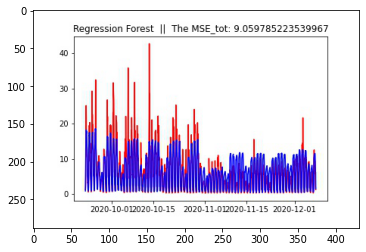

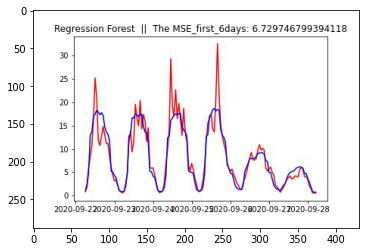

name                                              2020-12-10 15_24_23
features            [weekday, weekofyear, month, year, time, mean_...
target                                              Taux d'occupation
street                                                            sts
mse_tot                                                       9.08263
mse_first                                                     6.54531
min_samples_leaf                                                    5
path                /content/drive/My Drive/Hackathon_BCG_final/st...
Name: 1, dtype: object
['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'confin_0', 'confin_1', 'confin_2', 'couvrefeu', 'ferie', 'taux_occupation_sae']


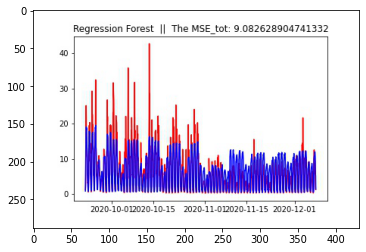

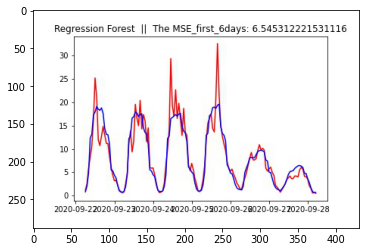

name                                              2020-12-10 15_25_24
features            [weekday, weekofyear, month, year, time, mean_...
target                                              Taux d'occupation
street                                                            sts
mse_tot                                                       9.23013
mse_first                                                     7.08753
min_samples_leaf                                                   10
path                /content/drive/My Drive/Hackathon_BCG_final/st...
Name: 2, dtype: object
['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'confin_0', 'confin_1', 'confin_2', 'couvrefeu', 'ferie', 'taux_occupation_sae']


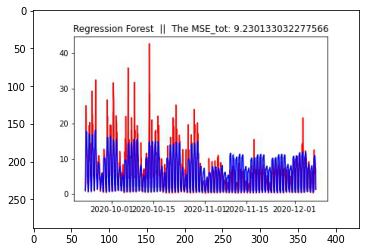

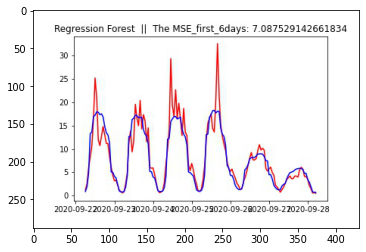

name                                              2020-12-10 15_25_00
features            [weekday, weekofyear, month, year, time, mean_...
target                                              Taux d'occupation
street                                                            sts
mse_tot                                                        9.3536
mse_first                                                     6.91879
min_samples_leaf                                                    8
path                /content/drive/My Drive/Hackathon_BCG_final/st...
Name: 3, dtype: object
['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'confin_0', 'confin_1', 'confin_2', 'couvrefeu', 'ferie', 'taux_occupation_sae']


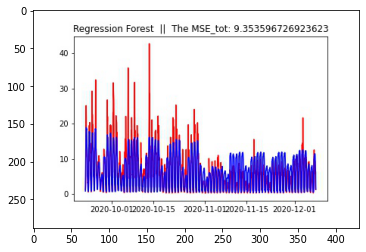

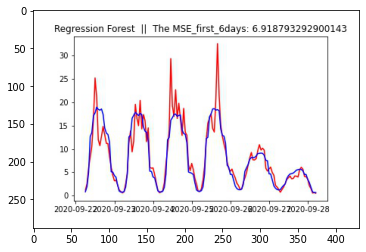

name                                              2020-12-10 15_25_12
features            [weekday, weekofyear, month, year, time, mean_...
target                                              Taux d'occupation
street                                                            sts
mse_tot                                                       9.55005
mse_first                                                     6.70807
min_samples_leaf                                                    9
path                /content/drive/My Drive/Hackathon_BCG_final/st...
Name: 4, dtype: object
['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'confin_0', 'confin_1', 'confin_2', 'couvrefeu', 'ferie', 'taux_occupation_sae']


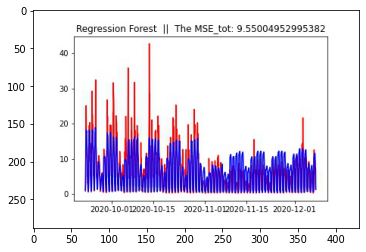

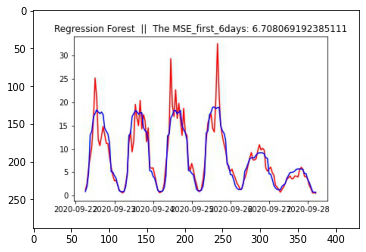

name                                              2020-12-10 15_25_19
features            [weekday, weekofyear, month, year, time, mean_...
target                                              Taux d'occupation
street                                                            sts
mse_tot                                                       9.71065
mse_first                                                     6.54712
min_samples_leaf                                                   10
path                /content/drive/My Drive/Hackathon_BCG_final/st...
Name: 5, dtype: object
['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'confin_0', 'confin_1', 'confin_2', 'couvrefeu', 'ferie']


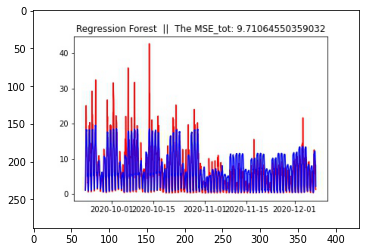

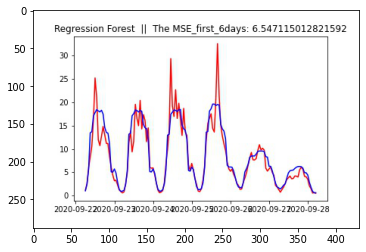

name                                              2020-12-10 15_24_36
features            [weekday, weekofyear, month, year, time, mean_...
target                                              Taux d'occupation
street                                                            sts
mse_tot                                                       10.1241
mse_first                                                     6.89363
min_samples_leaf                                                    6
path                /content/drive/My Drive/Hackathon_BCG_final/st...
Name: 6, dtype: object
['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'confin_0', 'confin_1', 'confin_2', 'couvrefeu', 'ferie', 'taux_occupation_sae']


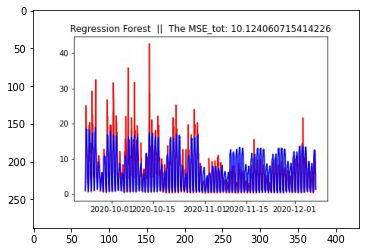

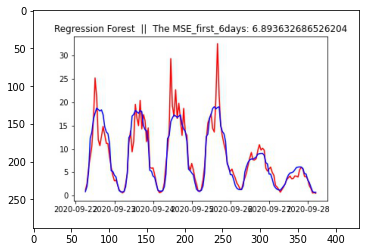

name                                              2020-12-10 15_24_55
features            [weekday, weekofyear, month, year, time, mean_...
target                                              Taux d'occupation
street                                                            sts
mse_tot                                                       10.9703
mse_first                                                     6.48022
min_samples_leaf                                                    8
path                /content/drive/My Drive/Hackathon_BCG_final/st...
Name: 7, dtype: object
['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'confin_0', 'confin_1', 'confin_2', 'couvrefeu', 'ferie']


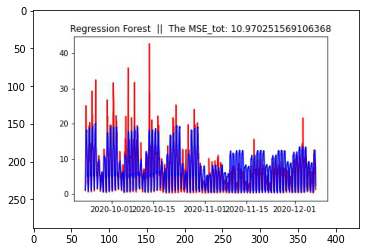

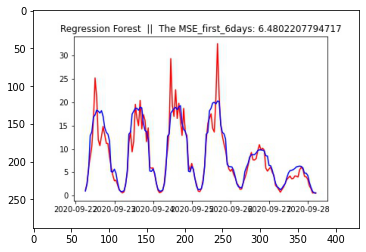

name                                              2020-12-10 15_24_34
features            [weekday, weekofyear, month, year, time, mean_...
target                                              Taux d'occupation
street                                                            sts
mse_tot                                                       11.1814
mse_first                                                     7.03747
min_samples_leaf                                                    6
path                /content/drive/My Drive/Hackathon_BCG_final/st...
Name: 8, dtype: object
['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'taux_occupation_sae']


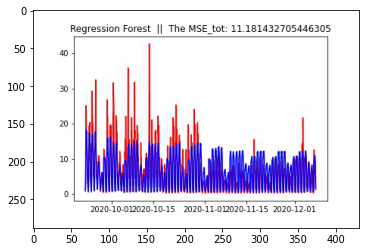

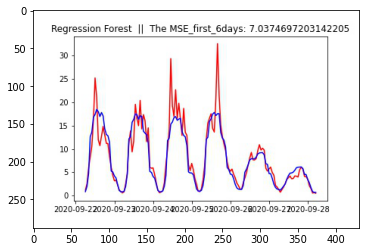

name                                              2020-12-10 15_24_58
features            [weekday, weekofyear, month, year, time, mean_...
target                                              Taux d'occupation
street                                                            sts
mse_tot                                                       11.7952
mse_first                                                     7.40295
min_samples_leaf                                                    8
path                /content/drive/My Drive/Hackathon_BCG_final/st...
Name: 9, dtype: object
['weekday', 'weekofyear', 'month', 'year', 'time', 'mean_taux_occupation_past_week', 'tmin', 'tmax', 'taux_occupation_sae']


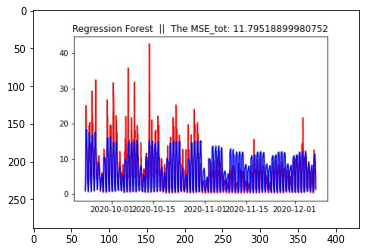

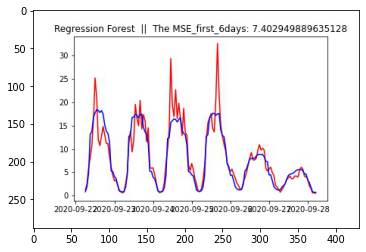

In [ ]:
for i in range(10) : 
  print(resume.loc[i])
  print(resume.loc[i,"features"])
  path = resume.loc[i,"path"]
  for file in os.listdir(path) : 
    if '.jpeg' in file : 
      img = mpimg.imread(os.path.join(resume.loc[i,'path'],file))
      plt.imshow(img)
      plt.show()

In [ ]:
"""

if "best" not in os.listdir(os.path.join(os.getcwd(),street,TARGET)) : 
  os.mkdir(os.path.join(os.getcwd(),street,TARGET, "best"))
  print("BEST")
top = 5
summary = []
count = 0
for i in range(top) : 
  e = resume.loc[i,"features"]
  min_samples_leaf = resume.loc[i , "min_samples_leaf"]
  week = 24*7
  print("Street : {}".format(street) )
  print('Target : {}'.format(TARGET) )

  if (street == 'washington' ):
    data_path = "datasets/washington_edited.csv" 
  
  elif (street == 'convention'):
    data_path = "datasets/convention_edited.csv"

  else :
    data_path = "datasets/sts_edited.csv"
  dataframe = pd.read_csv(data_path)
  # Do preprocessing
  dataframe.drop(["Unnamed: 0","index"], axis = 1 , inplace= True)
  dataframe = set_date(dataframe)
  dataframe.time = dataframe.time.apply(lambda x : int(x[:2]))
  
  if TARGET == "Taux d'occupation": 
    dataframe.drop(["Débit horaire","mean_debit_horaire_past_week","debit_horaire_past_week"], axis = 1 , inplace= True)
  else : 
    dataframe.drop(["Taux d'occupation","mean_taux_occupation_past_week","taux_occupation_past_week"], axis = 1 , inplace= True)
  
  dataframe.drop(["Etat trafic","Libelle noeud amont","Libelle noeud aval","date"], axis = 1 , inplace= True)
  dataframe = dataframe.interpolate() #get rid of NaN values
  df_train = dataframe[:-week]
  df_test = dataframe[-week:]
  tt = df_test['Date et heure de comptage']
  timestep = datetime.datetime.now().strftime('%Y-%m-%d %H_%M_%S')
  os.mkdir(os.path.join(os.getcwd(),street,TARGET,"best",timestep))
  print(timestep)
  x_train =  df_train[e].values
  x_test = df_test[e].values
  y_train = df_train[TARGET].values
  y_test = df_test[TARGET].values
  model = RandomForestRegressor(min_samples_leaf=min_samples_leaf)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  mse = mean_squared_error(y_test,pred)
  record = {'name' : timestep , 'features' : e, "target": TARGET, "street": street, "mse":mse , "min_samples_leaf" : min_samples_leaf, "path":os.path.join(os.getcwd(),street,TARGET,"best",timestep)}
  summary.append(record)
  pd.DataFrame.from_records([record]).to_csv(os.path.join(os.getcwd(),street,TARGET,"best",timestep,timestep+".csv"))
  fig = plt.figure(count)
  count = count + 1
  plt.plot(tt, y_test , color = 'r',label = 'real values')
  plt.plot(tt, pred , color ='b',label = 'prediected values')
  plt.title("Regression Forest  ||  The MSE: {}".format(mse))
  fig.savefig(os.path.join(os.getcwd(),street,TARGET,"best",timestep,timestep+'.jpeg'))
pd.DataFrame.from_records(summary).sort_values('mse').to_csv(os.path.join(os.getcwd(),street,TARGET,"best","Regression_Forest_"+street+'_'+TARGET+".csv"))

"""

In [ ]:
"""
summary = pd.read_csv(os.path.join(os.getcwd(),street,TARGET,"best",csv_name))
del summary['Unnamed: 0']
summary
"""

In [ ]:
"""
for i in range(len(summary)) : 
  print(i)
  print("MSE: {}    ||     Features: {}".format( str(summary.loc[i,"mse"]), summary.loc[i,'features']))
"""

In [ ]:
"""
for i in range(len(summary)) : 
  print(summary.loc[i])
  print(summary.loc[i,"features"])
  path = summary.loc[i,"path"]
  for file in os.listdir(path) : 
    if '.jpeg' in file : 
      img = mpimg.imread(os.path.join(summary.loc[i,'path'],file))
      plt.imshow(img)
      plt.show()
"""

In [ ]:
"""
if "best_models" not in os.listdir(os.path.join(os.getcwd())) : 
  os.mkdir(os.path.join(os.getcwd(), "best_models"))
  print("Folder created")
if street+'_' + TARGET not in os.listdir(os.path.join(os.getcwd(), "best_models")):
  os.mkdir(os.path.join(os.getcwd(), "best_models" ,street+'_' + TARGET ))
  print("Folder created")
  
pd.DataFrame.from_records([summary.loc[0].to_dict()])
path = summary.loc[0,"path"]
for file in os.listdir(path) : 
  if '.jpeg' in file :
    fig = plt.figure()
    img = mpimg.imread(os.path.join(summary.loc[0,'path'],file))
    plt.imshow(img)
    plt.show()
    fig.savefig(os.path.join(os.getcwd(),"best_models" ,street+'_' + TARGET ,"best_model.jpeg"))
pd.DataFrame.from_records([summary.loc[0].to_dict()]).to_csv(os.path.join(os.getcwd(),"best_models" ,street+'_' + TARGET ,"best_model.csv"))
"""